# Sample data from the Choroid plexus
This is a notebook describing analysis of a single cell dataset (10X, droplet-based) from the [Choroid plexus](https://en.wikipedia.org/wiki/Choroid_plexus) of Mus musculus ([Van Hove et al. 2019 Nature Neuroscience](https://www.ncbi.nlm.nih.gov/pubmed/31061494)). The original data were retrieved from [GEO (GSM3687214)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3687214), and the data have been included the the default adobo installation. The dataset mainly consists of macrophages.

First we need to load the Python package:

In [1]:
import adobo as ad

adobo version 0.2.52. Documentation: https://oscar-franzen.github.io/adobo/


### Load the gene expression data
The parameter `bundled=True` makes adobo aware that this dataset is example data and the user does not need to worry about paths. The `desc` parameter can be used to set a description of the dataset, it can be a long description or a short mnemonic. The `verbose=True` can be omitted, but instructs adobo to be more talkative. The `output_file` is a parameter we can use to set a filename where the object is saved by default. If `output_file` is set, then we can at anytime call the object function `save` to save the entire object to this file.

In [2]:
exp = ad.IO.load_from_file('GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz',
                           output_file='GSM3687214.joblib',
                           desc='Sample data (GSM3687214; Choroid plexus)',
                           bundled=True,
                           verbose=True)
# save the entire data object to "GSM3687214.joblib"
# exp.save()

Using a sparse matrix structure, please wait
Generating cell summary statistics...
Memory usage of loaded data: 83.51 MB
27,998 genes and 4,055 cells were loaded
loading took 0.2 minutes


***
It's always a good idea to quickly inspect that the data were loaded properly.

In [3]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 27,998x4,055)

Commands executed:

Normalizations available:

norm_data structure:


***
The data matrix consists of 27,998 genes and 4,055 cells. Let's also inspect the raw read counts:

In [4]:
exp.count_data

,AAACCTGAGAAGGTGA,AAACCTGAGCCAGTTT,AAACCTGAGTGTTGAA,AAACCTGCAATCTACG,AAACCTGCACGCGAAA,AAACCTGGTAAATACG,AAACCTGGTCTAGAGG,AAACCTGGTCTGCAAT,AAACCTGGTTATCACG,AAACCTGGTTCACCTC,...,TTTGTCAAGGCATGGT,TTTGTCAAGTATTGGA,TTTGTCAAGTGACTCT,TTTGTCACAGACGCAA,TTTGTCAGTACCGTAT,TTTGTCAGTCTTCAAG,TTTGTCATCGCCGTGA,TTTGTCATCGCGTTTC,TTTGTCATCTCCGGTT,TTTGTCATCTTGAGGT
C0,,,,,,,,,,,,,,,,,,,,,
Xkr4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm1992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gm37381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rp1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
PISD,1,1,0,2,0,1,0,0,0,0,...,0,0,1,6,3,0,1,1,1,1
DHRSX,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


***
`count_data` is a [Pandas](https://pandas.pydata.org/) data frame. By default the data frame is sparse.

### Generate summary plots and identify quality thresholds

Using these plots we can identify outlier cells and identify thresholds for removing uninformative genes. A good start is to plot the total read counts per cell.

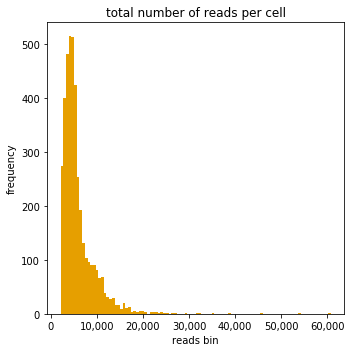

In [5]:
ad.plotting.overall(exp)

***
From the above histogram we can see that a few cells have excessive read counts. Let's count the the numbers of cells with at least 20,000 reads per cell:

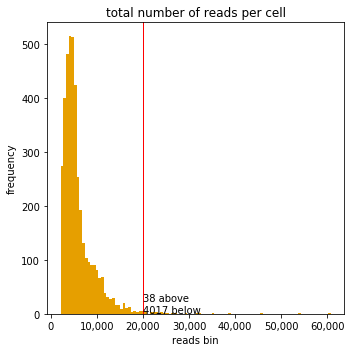

In [6]:
ad.plotting.overall(exp, cut_off=20000)

***
We can see that 38 cells are above the cut off, and we can decide to remove them later. But let's first explore how many genes are expressed per cell:

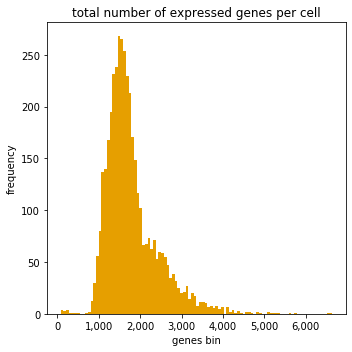

In [7]:
ad.plotting.overall(exp, what='genes')

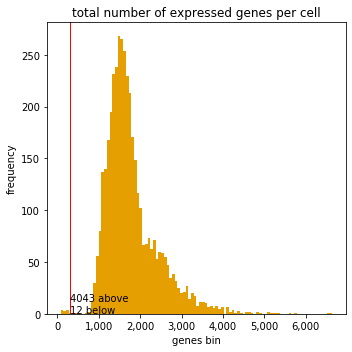

In [8]:
ad.plotting.overall(exp, what='genes', cut_off=300)

We can also relate the total read depth with the number of expressed genes in a scatter plot.

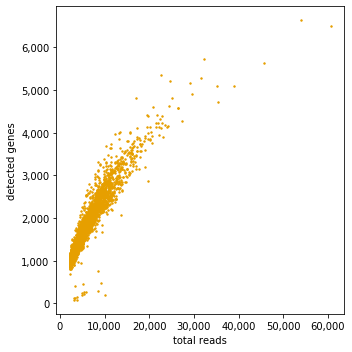

In [9]:
ad.plotting.overall_scatter(exp)

### Apply quality filters

The below command will filter the data to contain only cells with at least 1000 reads and not more than 20,000 reads.

In [6]:
ad.preproc.simple_filter(exp,
                         what='cells',
                         minreads=1000,
                         maxreads=20000)

38

In [11]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 27,998x4,017)

Commands executed:

Normalizations available:

norm_data structure:


***
It is also a good idea to remove uninformative genes. To do so we call the same function but set `what='genes'`.

In [7]:
ad.preproc.simple_filter(exp,
                         what='genes',
                         min_exp=10)

14662

The above command removes genes expressed in fewer than 10 cells (14,662 such genes were removed). Keep in mind that any cluster smaller than 10 cells will now be difficult to make sense of.

In [14]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 13,336x4,017)

Commands executed:

Normalizations available:

norm_data structure:


***
We can rerun `simple_filter` at any time to adjust the thresholds. Typing the name of the object, `exp`, gives information about the dimensions of the filtered data (13,336 genes and 4017 cells). We can now call `overall_scatter` again, and removed cells will be colored in red (if we are still not satisfied, we can go back and adjust the thresholds for `simple_filter`):

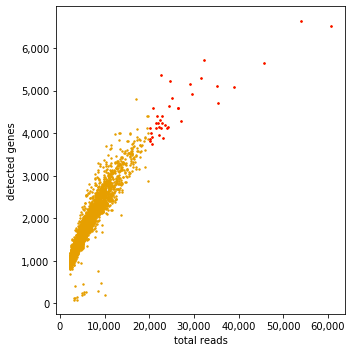

In [15]:
ad.plotting.overall_scatter(exp)

### Removing mitochondrial (MT) genes
Sometimes it's preferred to remove MT genes to avoid that cell clustering is influenced or driven by them. A single command will identify MT genes (assuming they have an annotation starting with `mt-`:

In [8]:
ad.preproc.find_mitochondrial_genes(exp, mito_pattern='^mt-')

13

The output indicates the number of MT genes found.

### Normalization

adobo supports 5 normalization procedures. We will here apply standard normalization. See help pages for the complete set of available normalization procedures.

In [9]:
ad.normalize.norm(exp, method='standard')

Running the above command will not generate any output by default. The normalized data is present in `exp.norm_data` (a nested dictionary). By typing `exp` we can see the structure of it:

In [10]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 13,336x4,017)

Commands executed:
find_mitochondrial_genes
norm (standard)

Normalizations available:
standard

norm_data structure:
standard
	data
	method
	log
	norm_ercc
	dr
	clusters
	slingshot
	de

***
If we want to examine the normalized data structure, we can easily accomplish it by accessing:

In [20]:
exp.norm_data['standard']['data']

,AAACCTGAGAAGGTGA,AAACCTGAGCCAGTTT,AAACCTGAGTGTTGAA,AAACCTGCAATCTACG,AAACCTGCACGCGAAA,AAACCTGGTAAATACG,AAACCTGGTCTAGAGG,AAACCTGGTCTGCAAT,AAACCTGGTTATCACG,AAACCTGGTTCACCTC,...,TTTGTCAAGGCATGGT,TTTGTCAAGTATTGGA,TTTGTCAAGTGACTCT,TTTGTCACAGACGCAA,TTTGTCAGTACCGTAT,TTTGTCAGTCTTCAAG,TTTGTCATCGCCGTGA,TTTGTCATCGCGTTTC,TTTGTCATCTCCGGTT,TTTGTCATCTTGAGGT
C0,,,,,,,,,,,,,,,,,,,,,
Mrpl15,2.232536,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.386372,0.000000,0.000000,...,0.00000,1.598163,1.694941,1.571244,0.000000,0.0,1.454196,1.611408,0.000000,0.000000
Lypla1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.556858,0.000000,0.000000,0.000000,...,1.40831,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.611408,0.000000,1.820341
Tcea1,0.000000,1.235510,0.0,0.000000,1.930006,0.000000,2.288137,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.694941,1.571244,0.000000,0.0,1.454196,0.000000,0.000000,0.000000
Atp6v1h,0.000000,1.891144,0.0,0.986627,1.930006,0.000000,0.000000,0.000000,0.000000,1.602288,...,1.40831,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Rb1cc1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.407566,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC125149.3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
AC168977.1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,1.405934,0.0,0.000000,0.000000,0.000000,0.000000
PISD,2.232536,1.235510,0.0,1.567104,0.000000,1.502251,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,1.694941,3.681410,2.572812,0.0,1.454196,1.611408,1.407566,1.820341


### Discover variable genes

Most downstream visualization algorithms like clustering perform better when applied on a subset of genes. The below command will identify 1000 variable genes using the method introduced in the Seurat R package:

In [11]:
ad.hvg.find_hvg(exp, method='seurat', ngenes=1000)

The identified genes can be extracted. To print the first ten:

In [12]:
exp.norm_data['standard']['hvg']['genes'][0:10]

array(['Hba-a2', 'Hba-a1', 'Cpa3', 'Tpsb2', 'Gzma', 'Nol4', 'Igfbp3',
       'Gmnc', 'Cd163l1', 'Ccl1'], dtype=object)

### Principal component analysis (PCA)

Next step is to perform PCA. Clustering is performed in PCA space.

Generate 60 PCA components from the data

In [13]:
ad.dr.pca(exp, ncomp=70, verbose=True)

Running PCA (method=irlb) on the standard normalization (dimensions 1000 genes x 4017 cells)
saving 70 components


***
As you see from the above output, PCA was run on the highly variable gene-subset of the data (1000 genes). But is 60 principal components too many or too few? One way to find out is to perform a jackstraw analysis, similar to Seurat's function for this, it can be done in adobo as well. `jackstraw` permutates a subset of the data and tests for the enrichment of significant genes in each principal component.

In [14]:
ad.dr.jackstraw(exp,
                fdr=0.01, # 1% FDR
                retx=False,
                verbose=False) # change to True if you want to see progress

The above command will run for a couple of minutes. After it has finished we can examine the results from the jackstraw analysis to see how many components we should include:

In [22]:
exp.norm_data['standard']['dr']['jackstraw']['results_by_comp']

,PC,chi2_p,chi2_p_adj,significant
0,PC0,8.011257e-111,2.803940e-109,True
1,PC1,2.398738e-143,1.679116e-141,True
2,PC2,3.617353e-56,3.165184e-55,True
3,PC3,2.048246e-78,2.389620e-77,True
4,PC4,2.284992e-92,3.198989e-91,True
...,...,...,...,...
65,PC65,9.163169e-03,1.087156e-02,False
66,PC66,7.650865e-02,7.993441e-02,False
67,PC67,6.167225e-01,6.167225e-01,False
68,PC68,7.650865e-02,7.993441e-02,False


From the above table we can see that after component 65, fewer components become significant. So let's stay use PCs 1-65 in our analyses:

In [23]:
ad.dr.pca(exp, ncomp=65, verbose=True)

Running PCA (method=irlb) on the standard normalization (dimensions 1000 genes x 4017 cells)
saving 65 components


In [24]:
exp

Filename (input): /home/rand/.local/lib/python3.7/site-packages/adobo/data/GSM3687214_countTable_K11_choroidPlexus_wt.txt.gz
Description: Sample data (GSM3687214; Choroid plexus)
Raw count matrix: 27,998 genes and 4,055 cells (filtered: 13,336x4,017)

Commands executed:
find_mitochondrial_genes
norm (standard)
find_hvg (seurat)
pca (irlb)

Normalizations available:
standard

norm_data structure:
standard
	data
	method
	log
	norm_ercc
	dr
		pca
			comp
			contr
			method
	clusters
	slingshot
	de
	hvg
		genes
		method

Another approach to determining the number of principal components to include is to generate an elbow plot (although the jackstraw approach is likely more powerful).

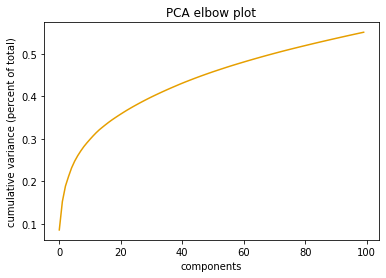

In [25]:
ad.plotting.pca_elbow(exp)

If we choose 60 components we can see from the plot that this would account for approx 40% of the variance. It might be a good idea to examine the gene loadings of each component, a task helpful in identifying important genes:

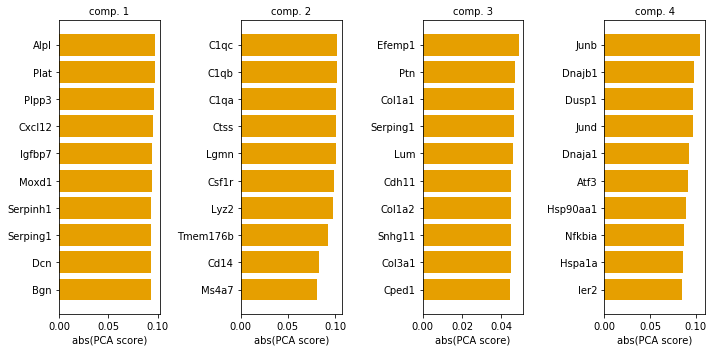

In [26]:
ad.plotting.pca_contributors(exp, fontsize=10, dim=4)

### Generate cell clusters

One of the key goals in single cell analysis is to reduce a large number of cells to a smaller number of cell clusters, to make analysis easier and interpretable. adobo supports a number of different clustering algorithms. Here we will use the Leiden algorithm, which typically yields good results:

In [27]:
ad.clustering.generate(exp, clust_alg='leiden')

To print sizes of the identified cell clusters, set `verbose=True`.

### 2d visualization

Visualization using methods like t-SNE and UMAP are supported. First generate the corresponding embedding:

In [28]:
ad.dr.umap(exp, verbose=True)

Running UMAP on the standard normalization
UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Fri Nov 29 12:28:08 2019 Finding Nearest Neighbors
Fri Nov 29 12:28:09 2019 Finished Nearest Neighbor Search
Fri Nov 29 12:28:11 2019 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs


In [29]:
ad.dr.tsne(exp, verbose=True)

Running tSNE (perplexity 30) on the standard normalization
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4017 samples in 0.013s...
[t-SNE] Computed neighbors for 4017 samples in 1.485s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4017
[t-SNE] Computed conditional probabilities for sample 2000 / 4017
[t-SNE] Computed conditional probabilities for sample 3000 / 4017
[t-SNE] Computed conditional probabilities for sample 4000 / 4017
[t-SNE] Computed conditional probabilities for sample 4017 / 4017
[t-SNE] Mean sigma: 1.879479
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.175529
[t-SNE] KL divergence after 2000 iterations: 1.318410


***
And now visualize:

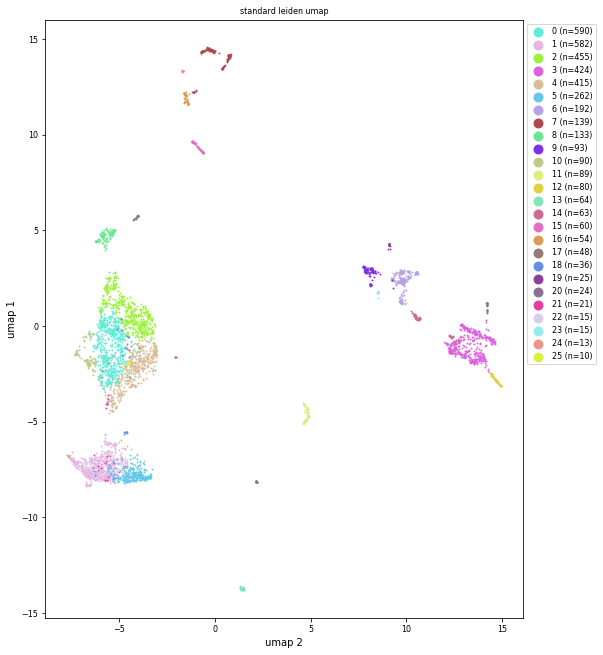

In [30]:
ad.plotting.cell_viz(exp, reduction='umap')

With t-SNE:

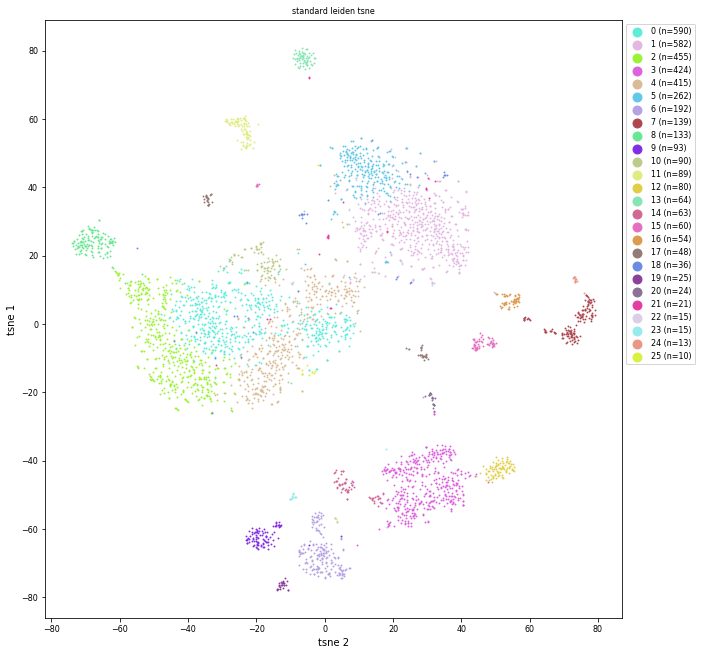

In [31]:
ad.plotting.cell_viz(exp, reduction='tsne')

Here we choose to proceed with the Louvain clustering.

### Predict cell types

Cell type prediction using collections of marker genes is one way to spark ideas.

In [32]:
ad.bio.cell_type_predict(exp)

Now we can take a look at the predictions (in the Python console, you can click on each cell cluster to see its annotation):

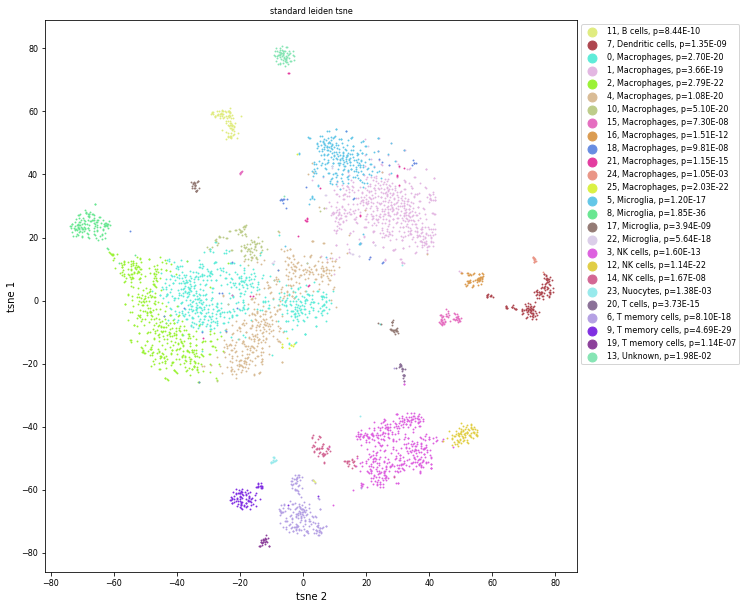

In [34]:
ad.plotting.cell_viz(exp, clustering='leiden', reduction='tsne', cell_types=True)

### What are the genes expressed in cluster 0?

Cluster 0 appears to be a macrophage cluster. We can start by revisiting the function `adobo.plotting.pca_contributors`. This time we add the parameter `cluster=0`, to indicate we want to generate a PCA decomposition of cluster 0.

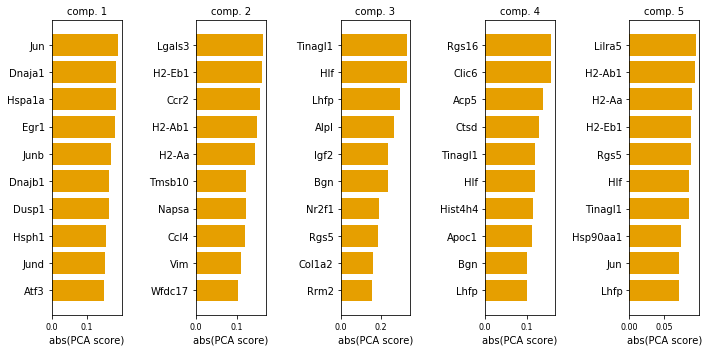

In [35]:
ad.plotting.pca_contributors(exp, fontsize=10, cluster=0)

From these plot of PCA loadings we see an enrichment of genes known to be expressed in macrophages. We can confirm expression in cluster 0 by adding the gene of interest in the `genes` parameter of the `adobo.plotting.cell_viz` function. Here is *Mafb*, part of [a known macrophage gene signature](https://www.jimmunol.org/content/198/5/2070):

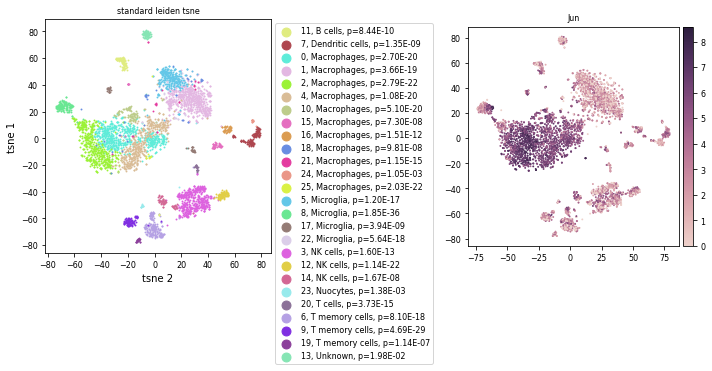

In [38]:
ad.plotting.cell_viz(exp, clustering='leiden', reduction='tsne', cell_types=True, genes='Jun$')

We can generate violin charts of the top 10 genes expressed in cluster 0:

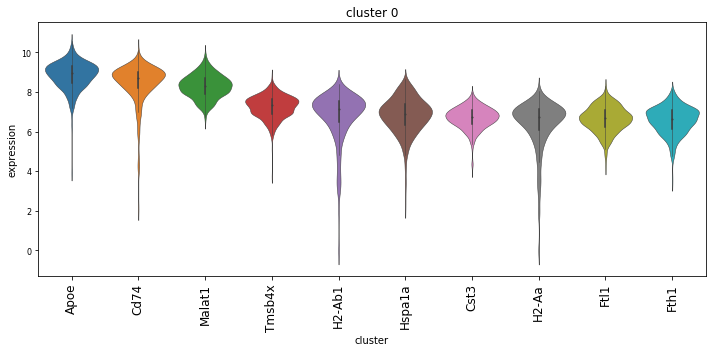

In [39]:
ad.plotting.genes_violin(exp, cluster=0, fontsize=12)

We can also examine the expression of *Cbr2* across all clusters:

Cd74


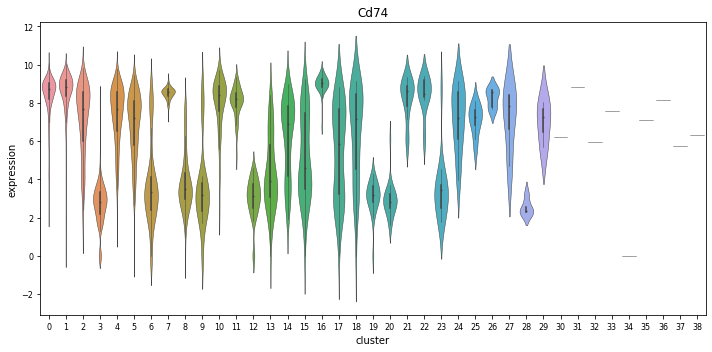

In [40]:
ad.plotting.genes_violin(exp, gene='Cd74')

Set `violin=False` to use a box plot instead:

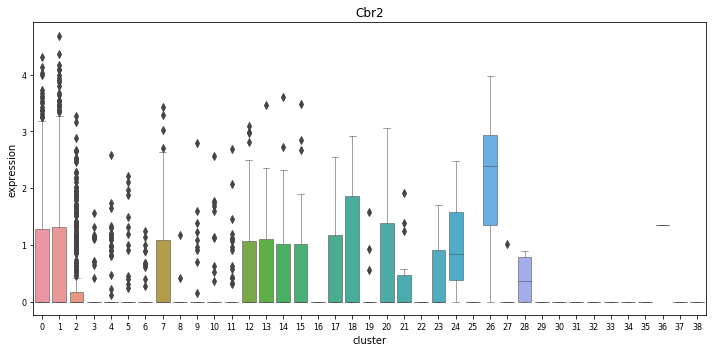

In [45]:
ad.plotting.genes_violin(exp, gene='Cbr2', violin=False)

### Meta data

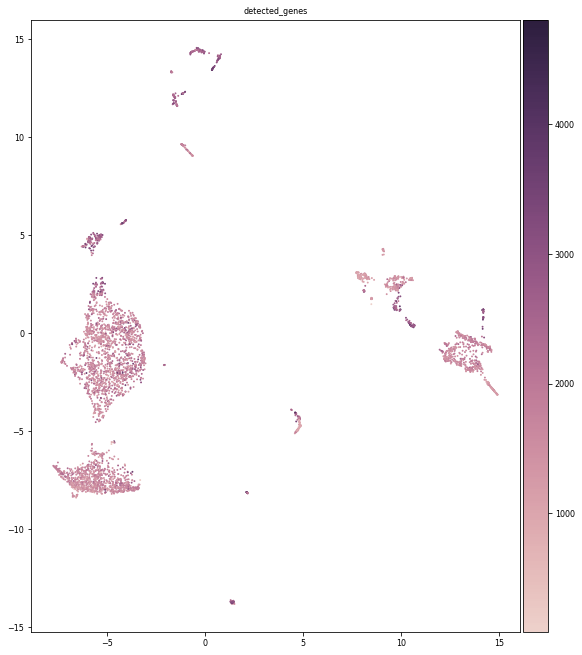

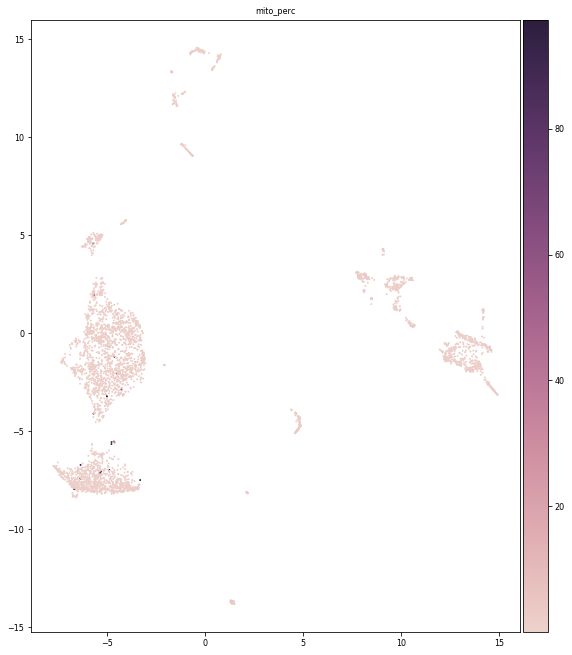

In [41]:
ad.plotting.cell_viz(exp, reduction='umap', metadata='detected_genes')
ad.plotting.cell_viz(exp, reduction='umap', metadata='mito_perc')

### Plot hierarchical relationship between clusters

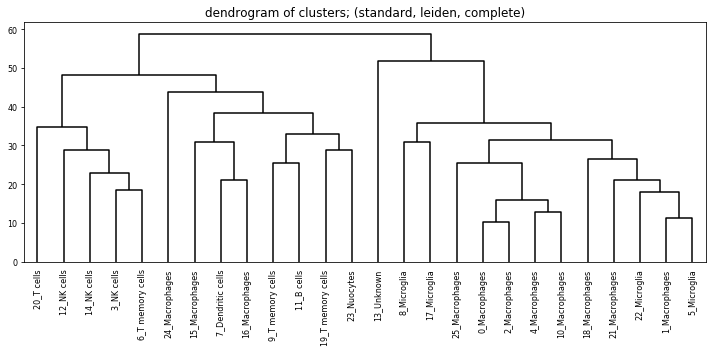

In [42]:
ad.plotting.tree(exp)

### Plot number of expressed genes per cluster

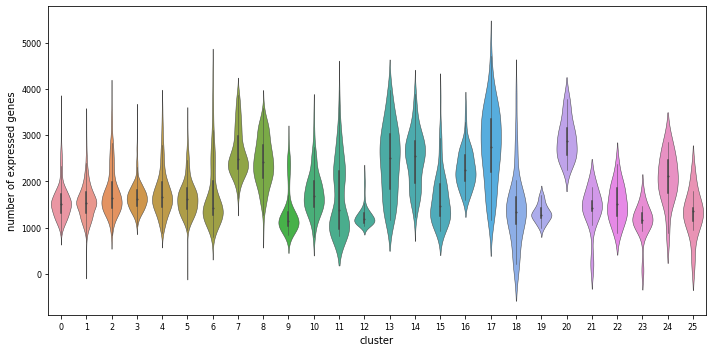

In [44]:
ad.plotting.exp_genes(exp)